# EDA ON STACK OVERFLOW 2018 DATA

**DATA LOADING**

*Importing modules*

In [310]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*Loading 2018 stackoverflow data*

In [311]:
df=pd.read_csv("/content/survey_results_sample_2018.csv")

*Initial exploration*

In [312]:
#First few rows of the data
df.head(10)

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
5,8,Yes,No,United Kingdom,No,Employed full-time,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",10 to 19 employees,Back-end developer;Database administrator;Fron...,...,1 - 2 times per week,Male,Straight or heterosexual,"Secondary school (e.g. American high school, G...",White or of European descent,18 - 24 years old,No,NaN,The survey was an appropriate length,Somewhat easy
6,9,Yes,Yes,United States,No,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Back-end developer;Front-end developer;Full-st...,...,I don't typically exercise,Male,Straight or heterosexual,"Master‚Äôs degree (MA, MS, M.Eng., MBA, etc.)",White or of European descent,18 - 24 years old,No,No,The survey was an appropriate length,Somewhat easy
7,10,Yes,Yes,Nigeria,No,Employed full-time,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",10 to 19 employees,Designer;Front-end developer;QA or test developer,...,1 - 2 times per week,Female,NaN,Primary/elementary school,Black or of African descent,25 - 34 years old,No,NaN,The survey was too long,Somewhat difficult
8,11,Yes,Yes,United States,No,Employed full-time,Some college/university study without earning ...,Fine arts or performing arts (ex. graphic desi...,100 to 499 employees,"Back-end developer;C-suite executive (CEO, CTO...",...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,Yes,No,The survey was an appropriate length,Very easy
9,16,No,Yes,India,No,Employed full-time,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",500 to 999 employees,Designer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [313]:
#dimensions of the data
df.shape

(99, 129)

In [314]:
#datatypes of the data
df.dtypes

Respondent        int64
Hobby            object
OpenSource       object
Country          object
Student          object
                  ...  
Age              object
Dependents       object
MilitaryUS       object
SurveyTooLong    object
SurveyEasy       object
Length: 129, dtype: object

In [315]:
df.columns

Index(['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment',
       'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType',
       ...
       'Exercise', 'Gender', 'SexualOrientation', 'EducationParents',
       'RaceEthnicity', 'Age', 'Dependents', 'MilitaryUS', 'SurveyTooLong',
       'SurveyEasy'],
      dtype='object', length=129)

**DATA** **CLEANING**

In [316]:
#checking for the missing or null values
missing_values=df.isnull().sum()
missing_values

Respondent        0
Hobby             0
OpenSource        0
Country           0
Student           1
                 ..
Age              32
Dependents       32
MilitaryUS       80
SurveyTooLong    32
SurveyEasy       32
Length: 129, dtype: int64

By this we can get to the conclusion that there exist missing values

In [317]:
#calculating percentage of missing values
total_cells=np.product(df.shape)
total_missing=missing_values.sum()
percent=(total_missing/total_cells)*100

In [318]:
print('Total number of cells: ', total_cells)
print('Total number of missing values: ', total_missing)
print('Missing Percentage: ', percent, '%')

Total number of cells:  12771
Total number of missing values:  4421
Missing Percentage:  34.61749275702764 %


approximately 35% of data is missing we need to handle the missing values

**cleaning the gender column**

In [319]:
# Calculate the missing percentage of the 'Gender' column
df['Gender'].isnull().sum()
missing_percentage_gender = (df['Gender'].isnull().sum() / len(df['Gender'])) * 100

print("Missing percentage of the 'Gender' column:", missing_percentage_gender, "%")


Missing percentage of the 'Gender' column: 32.323232323232325 %


32% of the gender data is missing lets categorize them

In [320]:
df['Gender'].unique()

array(['Male', nan, 'Female',
       'Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming',
       'Female;Male',
       'Male;Non-binary, genderqueer, or gender non-conforming'],
      dtype=object)

In [321]:
#counting the number of each gender
df.groupby('Gender')['Gender'].count()

Gender
Female                                                                        5
Female;Male                                                                   1
Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming     1
Male                                                                         59
Male;Non-binary, genderqueer, or gender non-conforming                        1
Name: Gender, dtype: int64

Filling the missing values and reducing the number of divisions to male,female and non confirmed only to get easy analysis

In [322]:
df['Gender'] = df['Gender'].fillna('Non-binary, genderqueer, or gender non-conforming')
df['Gender'].replace('Female;Male;Non-binary, genderqueer, or gender non-conforming', 'Female', inplace =True)
df['Gender'].replace('Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming', 'Female', inplace =True)
df['Gender'].replace('Female;Non-binary, genderqueer, or gender non-conforming', 'Female', inplace =True)
df['Gender'].replace('Female;Transgender;Non-binary, genderqueer, or gender non-conforming', 'Female', inplace =True)
df['Gender'].replace('Male;Non-binary, genderqueer, or gender non-conforming', 'Male', inplace =True)
df['Gender'].replace('Male;Transgender;Non-binary, genderqueer, or gender non-conforming', 'Male', inplace =True)
df['Gender'].replace('Transgender;Non-binary, genderqueer, or gender non-conforming', 'Non-conforming', inplace =True) ##not sure
df['Gender'].replace('Female;Male', 'Female', inplace =True)
df['Gender'].replace('Female;Male;Transgender', 'Female', inplace =True)
df['Gender'].replace('Female;Transgender', 'Female', inplace =True)
df['Gender'].replace('Male;Transgender', 'Female', inplace =True)
df['Gender'].replace('Non-binary, genderqueer, or gender non-conforming', 'Non-conforming', inplace =True) #
df['Gender'].replace('Transgender', 'Male', inplace =True)

In [323]:
df.groupby('Gender')['Gender'].count()

Gender
Female             7
Male              60
Non-conforming    32
Name: Gender, dtype: int64

In [324]:
df.shape

(99, 129)

In [325]:
df.isnull().sum()['Gender']

0

Hence, there are no existing null values in gender column






**cleaning the country column**

In [326]:
df.groupby('Country')['Country'].count()

Country
Algeria                1
Argentina              2
Australia              1
Belgium                1
Brazil                 1
Bulgaria               1
Chile                  1
China                  2
Colombia               1
Croatia                1
Denmark                1
Dominican Republic     1
Finland                1
France                 3
Germany                5
Greece                 1
India                 16
Indonesia              2
Ireland                1
Israel                 1
Japan                  1
Kenya                  1
Latvia                 1
Netherlands            1
Nigeria                1
Poland                 3
Romania                1
Russian Federation     4
South Africa           1
Spain                  2
Sweden                 3
Ukraine                1
United Kingdom         7
United States         28
Name: Country, dtype: int64

In [327]:
df['Country'].isnull().sum()

0

In [328]:
#filling null values
df['Country'].fillna(method='ffill', inplace=True)

In [329]:
df['Country'].isnull().sum()

0

Hence, there are no existing null values in country column

**cleaning the hobbies column**

In [330]:
df['Hobby'].isnull().sum()

0

In [331]:
df.groupby('Hobby')['Hobby'].count()

Hobby
No     20
Yes    79
Name: Hobby, dtype: int64

As the hobbies are categorized only to yes or not further we dont need to categorize them.

In [332]:
df['Hobby'].isnull().sum()

0

Hence, there are no existing null values in hobbies column

**cleaning the undergradmajor column**

In [333]:
df['UndergradMajor'].isnull().sum()

11

In [334]:
df['UndergradMajor'].value_counts()

UndergradMajor
Computer science, computer engineering, or software engineering          56
A natural science (ex. biology, chemistry, physics)                       7
Another engineering discipline (ex. civil, electrical, mechanical)        7
A business discipline (ex. accounting, finance, marketing)                5
Fine arts or performing arts (ex. graphic design, music, studio art)      4
Information systems, information technology, or system administration     3
Mathematics or statistics                                                 2
Web development or web design                                             2
A social science (ex. anthropology, psychology, political science)        1
A humanities discipline (ex. literature, history, philosophy)             1
Name: count, dtype: int64

In [335]:
def refactor_major(df):
    conditions_major = [(df['UndergradMajor'] == 'Computer science, computer engineering, or software engineering'),
                        (df['UndergradMajor'] == 'Another engineering discipline (ex. civil, electrical, mechanical)'),
                        (df['UndergradMajor'] == 'Information systems, information technology, or system administration'),
                        (df['UndergradMajor'] == 'Mathematics or statistics'),
                        (df['UndergradMajor'] == 'A natural science (ex. biology, chemistry, physics)')
                        |(df['UndergradMajor'] == 'A health science (ex. nursing, pharmacy, radiology)'),
                        (df['UndergradMajor'] == 'Web development or web design'),
                        (df['UndergradMajor'] == 'A business discipline (ex. accounting, finance, marketing)'),
                        (df['UndergradMajor'] == 'A humanities discipline (ex. literature, history, philosophy)')
                        | (df['UndergradMajor'] == 'A social science (ex. anthropology, psychology, political science)')
                        | (df['UndergradMajor'] == 'Fine arts or performing arts (ex. graphic design, music, studio art)'),
                        (df['UndergradMajor'] == 'I never declared a major') ]

    choices_major = ['Computer Science', 'Engineering', 'Info Systems', 'Math/Stat', 'Other Science',
                     'Web Design/Dev', 'Business', 'Arts and Science', 'No major']
    df['UndergradMajor'] = np.select(conditions_major, choices_major, default = np.NaN)
    return df

the values in the "UndergradMajor" column are classified based on certain conditions.

In [336]:
df = refactor_major(df)

In [337]:
df['UndergradMajor'].replace('nan', 'No major', inplace=True)

In [338]:
df['UndergradMajor'].value_counts()

UndergradMajor
Computer Science    56
No major            11
Other Science        7
Engineering          7
Arts and Science     6
Business             5
Info Systems         3
Math/Stat            2
Web Design/Dev       2
Name: count, dtype: int64

In [339]:
df['UndergradMajor'].isnull().sum()

0

In [340]:
df.dropna(subset=['UndergradMajor'], inplace=True)

In [341]:
df['UndergradMajor'].isnull().sum()

0

As we assigned the remaining null values to the category of no major
Hence, there are no existing null values in the undergradmajor column

**cleaning the jobsearchstatus column**

In [342]:
df['JobSearchStatus'].value_counts()

JobSearchStatus
I‚Äôm not actively looking, but I am open to new opportunities    54
I am not interested in new job opportunities                      18
I am actively looking for a job                                   11
Name: count, dtype: int64

In [343]:
#dropping null values
df.dropna(subset=['JobSearchStatus'], inplace=True)

Categorizing those into groups: the ones who are seeking for job and the ones who are not seeking for job and others

In [344]:
def refactor_job(df):
    '''function to change JobStatus category to Seeking and Non Seeking'''

    conditions_job = [(df['JobSearchStatus'] == 'I am actively looking for a job'),
                    (df['JobSearchStatus'] == 'I am not interested in new job opportunities')
                    | (df['JobSearchStatus'] == 'I’m not actively looking, but I am open to new opportunities')]

    choices_job = ['Seeking', 'Not seeking']

    df['JobSearchStatus'] = np.select(conditions_job, choices_job, default=np.nan)

    return df


In [345]:
df = refactor_job(df)

In [346]:
df['JobSearchStatus'].value_counts()

JobSearchStatus
nan            54
Not seeking    18
Seeking        11
Name: count, dtype: int64

In [347]:
df['JobSearchStatus'].isnull().sum()

0

Hence, there are no existing null values in the jobsearchstatus column

**cleaning the Employement column**

In [348]:
df['Employment'].value_counts()

Employment
Employed full-time    77
Employed part-time     6
Name: count, dtype: int64

In [349]:
df['Employment'].isnull().sum()

0

In [350]:
df['Employment'].fillna(method='ffill', inplace=True)

In [351]:
df['Employment']

0     Employed part-time
1     Employed full-time
2     Employed full-time
3     Employed full-time
4     Employed full-time
             ...        
93    Employed full-time
94    Employed full-time
95    Employed full-time
97    Employed full-time
98    Employed full-time
Name: Employment, Length: 83, dtype: object

In [352]:
df['Employment'].isnull().sum()

0

Hence, there are no existing null values in the employment column

**Job** **Satisfaction**

In [353]:
df['JobSatisfaction'].value_counts()

JobSatisfaction
Moderately satisfied                  26
Slightly satisfied                    17
Neither satisfied nor dissatisfied    11
Extremely satisfied                    9
Slightly dissatisfied                  9
Moderately dissatisfied                6
Extremely dissatisfied                 2
Name: count, dtype: int64

In [354]:
df['JobSatisfaction'].isnull().sum()

3

In [355]:
#filling the null values
df['JobSatisfaction'].fillna(method='ffill', inplace=True)

In [356]:
df['JobSatisfaction'].isnull().sum()

0

Hence, there are no existing null values in the job satisfaction column

**Race Ethnicity**

In [357]:
df.groupby('RaceEthnicity')['RaceEthnicity'].count()

RaceEthnicity
Black or of African descent                                                                                                                                                              3
Black or of African descent;East Asian;Hispanic or Latino/Latina;Middle Eastern;Native American, Pacific Islander, or Indigenous Australian;South Asian;White or of European descent     1
Black or of African descent;Hispanic or Latino/Latina                                                                                                                                    1
East Asian                                                                                                                                                                               2
Hispanic or Latino/Latina                                                                                                                                                                1
Hispanic or Latino/Latina;White or of European desc

combining the given Ethnicity by str.match which means if each string starts with a match of a regular expression pattern then they will be categorized.


In [358]:
df.loc[df['RaceEthnicity'].str.match('Biracial') == True, 'RaceEthnicity'] = 'Biracial'
df.loc[df['RaceEthnicity'].str.match('Black or of African descent') == True, 'RaceEthnicity'] = 'Black or African descent'
df.loc[df['RaceEthnicity'].str.match('East Asian') == True, 'RaceEthnicity'] = 'East Asian'
df.loc[df['RaceEthnicity'].str.match('Hispanic or Latino') == True, 'RaceEthnicity'] = 'Hispanic or Latino'
df.loc[df['RaceEthnicity'].str.match('Indigenous') == True, 'RaceEthnicity'] = 'Indigenous'
df.loc[df['RaceEthnicity'].str.match('Middle Eastern') == True, 'RaceEthnicity'] = 'Middle Eastern'
df.loc[df['RaceEthnicity'].str.match('South') == True, 'RaceEthnicity'] = 'South Asian'
df.loc[df['RaceEthnicity'].str.match('White or of European descent') == True, 'RaceEthnicity'] = 'White or European descent'
df.loc[df['RaceEthnicity'].str.match('Multiracial') == True, 'RaceEthnicity'] = 'Multiracial'
df.loc[df['RaceEthnicity'].str.match('Native American') == True, 'RaceEthnicity'] = 'Native American'

In [359]:
df.groupby('RaceEthnicity')['RaceEthnicity'].count()

RaceEthnicity
Black or African descent      5
East Asian                    2
Hispanic or Latino            2
South Asian                   8
White or European descent    41
Name: RaceEthnicity, dtype: int64

In [360]:
df['RaceEthnicity'].isnull().sum()

25

In [361]:
#This code performs forward and backward filling of missing values in the RaceEthnicity column based on the values in the Country column.
df['RaceEthnicity']=df.groupby(['Country'])['RaceEthnicity'].bfill().ffill()

In [362]:
df['RaceEthnicity'].isnull().sum()

0

Hence, there are no existing null values in the race ethnicity column

**DevType**

In [363]:
df['DevType'].isnull().sum()

0

In [364]:
df['DevType'].fillna(method='ffill', inplace=True)

In [365]:
df.groupby('DevType')['DevType'].count()

DevType
Back-end developer                                                                                                                                                                       2
Back-end developer;C-suite executive (CEO, CTO, etc.);Data or business analyst;Database administrator;DevOps specialist;Engineering manager;Full-stack developer;System administrator    1
Back-end developer;C-suite executive (CEO, CTO, etc.);Database administrator;Designer;Front-end developer;Full-stack developer;Mobile developer                                          1
Back-end developer;C-suite executive (CEO, CTO, etc.);Database administrator;DevOps specialist;Engineering manager;Full-stack developer;System administrator                             1
Back-end developer;Data or business analyst;Database administrator;DevOps specialist;Front-end developer;Full-stack developer;System administrator                                       1
Back-end developer;Data or business analyst;Designer;Fron

combining the given DevType by str.match which means if each string starts with a match of a regular expression pattern then they will be categorized.

In [366]:
#categorizing the given fields into developer,manager,student,non developer roles
df.loc[df['DevType'].str.match('Back-end developer') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Student') == True, 'DevType'] = 'Student'
df.loc[df['DevType'].str.match('QA or test developer') == True, 'DevType'] = 'Non developer'
df.loc[df['DevType'].str.match('Product manager') == True, 'DevType'] = 'Manager'
df.loc[df['DevType'].str.match('Mobile developer') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Marketing or sales professional') == True, 'DevType'] = 'Non developer'
df.loc[df['DevType'].str.match('System administrator') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Game or graphics developer') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Full-stack developer') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Front-end developer') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Engineering manager') == True, 'DevType'] = 'Manager'
df.loc[df['DevType'].str.match('Embedded applications or devices developer') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Educator or academic researcher') == True, 'DevType'] = 'Student'
df.loc[df['DevType'].str.match('DevOps specialist') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Desktop or enterprise applications developer') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Designer') == True, 'DevType'] = 'Non developer'
df.loc[df['DevType'].str.match('Database administrator') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Data scientist or machine learning specialist') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Data or business analyst') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('C-suite executive') == True, 'DevType'] = 'Developer'


In [367]:
df.groupby('DevType')['DevType'].count()

DevType
Developer        74
Manager           2
Non developer     5
Student           2
Name: DevType, dtype: int64

**Language worked with**

In [368]:
#this return tha 3 most frequent entries or the 3 most used languages
df['LanguageWorkedWith'].value_counts().nlargest(3)

LanguageWorkedWith
Java;JavaScript;PHP;SQL;TypeScript;HTML;CSS    2
JavaScript;PHP;HTML;CSS                        2
C;F#;Haskell;Python;Scala                      1
Name: count, dtype: int64

In [369]:
df['LanguageWorkedWith'].isnull().sum()

14

In [370]:
#filling missing values
df['LanguageWorkedWith'].fillna(method='ffill', inplace=True)

In [371]:
df['LanguageWorkedWith'].value_counts().nlargest(3)

LanguageWorkedWith
Java;JavaScript;PHP;VB.NET;HTML;CSS                3
Assembly;C;C++;Java;Python;Delphi/Object Pascal    2
Java;JavaScript;PHP;SQL;TypeScript;HTML;CSS        2
Name: count, dtype: int64

In [372]:
df['LanguageWorkedWith'].isnull().sum()

0

Hence, there are no existing null values in the language work with column

**Language desirednext year**

In [373]:
#this return tha 3 most frequent entries that may appear the next year.
df['LanguageDesireNextYear'].value_counts().nlargest(3)

LanguageDesireNextYear
C#;JavaScript;PHP;SQL;HTML;CSS    2
JavaScript;Python;HTML;CSS        1
C#;JavaScript;TypeScript          1
Name: count, dtype: int64

In [374]:
df['LanguageDesireNextYear'].isnull().sum()

18

In [375]:
#filling missing values
df['LanguageDesireNextYear'].fillna(method='ffill', inplace=True)

In [376]:
df['LanguageDesireNextYear'].value_counts().nlargest(3)

LanguageDesireNextYear
Java;Python                                    4
JavaScript;PHP;SQL;Swift;CSS;Bash/Shell        2
C#;Java;JavaScript;Ruby;TypeScript;HTML;CSS    2
Name: count, dtype: int64

In [377]:
df['LanguageDesireNextYear'].isnull().sum()

0

Hence, there are no existing null values in the language Desire next year column

**Yearscodingprof**

In [378]:
#this returns the the top 10 most coding proficient ones
df['YearsCodingProf'].value_counts().nlargest(10)

YearsCodingProf
3-5 years      26
0-2 years      20
6-8 years      12
9-11 years      9
12-14 years     6
18-20 years     3
21-23 years     2
24-26 years     2
15-17 years     1
Name: count, dtype: int64

In [379]:
df['YearsCodingProf'].isnull().sum()

2

In [380]:
df['YearsCodingProf'].fillna(method='ffill', inplace=True)

In [381]:
df['YearsCodingProf'].value_counts().nlargest(10)

YearsCodingProf
3-5 years      27
0-2 years      21
6-8 years      12
9-11 years      9
12-14 years     6
18-20 years     3
21-23 years     2
24-26 years     2
15-17 years     1
Name: count, dtype: int64

In [382]:
df['YearsCodingProf'].isnull().sum()

0

Hence, there are no existing null values in the yearscodingprof column

In [383]:
#the top 10 years coding ones
df['YearsCoding'].value_counts().nlargest(10)

YearsCoding
6-8 years           17
3-5 years           15
9-11 years          15
0-2 years           11
15-17 years          7
12-14 years          6
24-26 years          5
18-20 years          4
30 or more years     3
Name: count, dtype: int64

In [384]:
df['YearsCoding'].isnull().sum()

0

In [385]:
#filling missing values
df['YearsCoding'].fillna(method='ffill', inplace=True)

In [386]:
df['YearsCoding'].value_counts().nlargest(10)

YearsCoding
6-8 years           17
3-5 years           15
9-11 years          15
0-2 years           11
15-17 years          7
12-14 years          6
24-26 years          5
18-20 years          4
30 or more years     3
Name: count, dtype: int64

In [387]:
df['YearsCoding'].isnull().sum()

0

Hence, there are no existing null values in the yearscoding column

**Operating System**

In [388]:
#top 10 most used operating systems
df['OperatingSystem'].value_counts().nlargest(10)

OperatingSystem
Windows        32
MacOS          20
Linux-based    15
BSD/Unix        1
Name: count, dtype: int64

In [389]:
df['OperatingSystem'].isnull().sum()

15

In [390]:
#filling values
df['OperatingSystem'].fillna(method='ffill', inplace=True)

In [391]:
df['OperatingSystem'].value_counts().nlargest(10)

OperatingSystem
Windows        44
MacOS          21
Linux-based    17
BSD/Unix        1
Name: count, dtype: int64

In [392]:
df['OperatingSystem'].isnull().sum()

0

Hence, there are no existing null values in the operating system column

**Salary Type**

In [393]:
#top 10 frequently used salary types
df['SalaryType'].value_counts().nlargest(10)

SalaryType
Monthly    25
Yearly     22
Weekly      1
Name: count, dtype: int64

In [394]:
df['SalaryType'].isnull().sum()

35

In [395]:
df['SalaryType'].fillna(method='ffill', inplace=True)

In [396]:
df['SalaryType'].value_counts().nlargest(10)

SalaryType
Monthly    42
Yearly     39
Weekly      2
Name: count, dtype: int64

In [397]:
df['SalaryType'].isnull().sum()

0

Hence, there are no existing null values in the salary type column

**Currency**

In [398]:
#top 10 used currency
df['Currency'].value_counts().nlargest(10)

Currency
U.S. dollars ($)                20
Euros (‚Ç¨)                     11
British pounds sterling (¬£)     7
Indian rupees (‚Çπ)              7
Swedish kroner (SEK)             3
Russian rubles (‚ÇΩ)             3
Polish z≈Çoty (z≈Ç)              2
Chinese yuan renminbi (¬•)       2
South African rands (R)          1
Australian dollars (A$)          1
Name: count, dtype: int64

In [399]:
df['Currency'].isnull().sum()

23

In [400]:
df['Currency'].fillna(method='ffill', inplace=True)

In [401]:
df.dropna(subset=['Currency'], inplace = True)

In [402]:
df['Currency'].value_counts().nlargest(10)

Currency
U.S. dollars ($)                27
Euros (‚Ç¨)                     16
British pounds sterling (¬£)    10
Indian rupees (‚Çπ)              8
Chinese yuan renminbi (¬•)       5
Swedish kroner (SEK)             4
Russian rubles (‚ÇΩ)             4
Polish z≈Çoty (z≈Ç)              2
Brazilian reais (R$)             2
South African rands (R)          1
Name: count, dtype: int64

In [403]:
df['Currency'].isnull().sum()

0

Hence, there are no existing null values in the currency column

renaming the column for our convinience

In [404]:
col=['Age','ConvertedSalary','Country','Currency','DevType','Employment','RaceEthnicity','Gender','SalaryType','Hobby','JobSatisfaction','JobSearchStatus','OperatingSystem','UndergradMajor','YearsCoding','YearsCodingProf','LanguageDesireNextYear','LanguageWorkedWith','FormalEducation']
df1=df[col]
#renaming the coloumn
# 'ConvertedSalary': 'SalaryUSD'
df.rename(columns={'ConvertedSalary': 'SalaryUSD' }, inplace =True)
df.sort_index(axis=1).head(2)

,AIDangerous,AIFuture,AIInteresting,AIResponsible,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsActions,AdsAgreeDisagree1,AdsAgreeDisagree2,...,SurveyEasy,SurveyTooLong,TimeAfterBootcamp,TimeFullyProductive,UndergradMajor,UpdateCV,VersionControl,WakeTime,YearsCoding,YearsCodingProf
1,Increasing automation of jobs,I'm excited about the possibilities more than ...,Increasing automation of jobs,The developers or the people creating the AI,Yes,Yes,The website I was visiting asked me to disable it,NaN,Somewhat agree,Neither agree nor disagree,...,Somewhat easy,The survey was an appropriate length,NaN,One to three months,Other Science,I saw an employer‚Äôs advertisement,Git;Subversion,Between 6:01 - 7:00 AM,30 or more years,18-20 years
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Computer Science,NaN,NaN,NaN,24-26 years,6-8 years


In [405]:
#top 10 salaries
df['SalaryUSD'].value_counts().nlargest(10)

SalaryUSD
120000.0    3
30000.0     2
115000.0    2
70841.0     1
36000.0     1
90000.0     1
73428.0     1
128507.0    1
13212.0     1
48955.0     1
Name: count, dtype: int64

In [406]:
df['SalaryUSD'].isnull().sum()

36

In [407]:
#grouping the salary based on the devtype and their country
mean_salary = df.groupby(['DevType','Country'])['SalaryUSD'].mean()

In [408]:
mean_salary.nlargest(10)

DevType        Country       
Developer      United States     146687.5
               Ireland           128507.0
Non developer  India             123984.0
Developer      Australia          95968.0
               Colombia           64116.0
               Germany            61191.5
               Sweden             60257.5
               China              52604.0
               Greece             51408.0
               United Kingdom     48144.8
Name: SalaryUSD, dtype: float64

In [409]:
#grouping the salary based on the devtype and their country and results the mean for each
means = df.groupby(['YearsCodingProf','DevType', 'Country'])['SalaryUSD'].transform('mean')

In [410]:
#filling the null values with the mean values
df['SalaryUSD'] = df['SalaryUSD'].fillna(means)

In [411]:
#grouping the mean salry based on the yearscodingprof,devtype and country columns
mean_salary = df.groupby(['YearsCodingProf','DevType','Country'])['SalaryUSD'].mean()

In [412]:
mean_salary.nlargest(10)

YearsCodingProf  DevType        Country       
21-23 years      Developer      United States     250000.000000
0-2 years        Developer      United States     244000.000000
15-17 years      Developer      Ireland           128507.000000
0-2 years        Non developer  India             123984.000000
9-11 years       Developer      United States     115000.000000
12-14 years      Developer      Australia          95968.000000
18-20 years      Developer      United States      95000.000000
6-8 years        Developer      United States      91333.333333
3-5 years        Developer      China              85708.000000
9-11 years       Developer      United Kingdom     82648.000000
Name: SalaryUSD, dtype: float64

In [413]:
df.dropna(subset=['SalaryUSD'], inplace = True)

**AGE**

In [414]:
#frequently used top 10 ages
df['Age'].value_counts().nlargest(10)

Age
25 - 34 years old    22
35 - 44 years old    13
18 - 24 years old    13
45 - 54 years old     1
Name: count, dtype: int64

In [415]:
df['Age'].isnull().sum()

10

In [416]:
df['Age'].fillna(method='ffill', inplace=True)

In [417]:
df['Age'].value_counts().nlargest(10)

Age
25 - 34 years old    26
35 - 44 years old    16
18 - 24 years old    16
45 - 54 years old     1
Name: count, dtype: int64

In [418]:
df['Age'].isnull().sum()

0

Hence, there are no existing null values in age column

**Formal Education**


In [419]:
df['FormalEducation'].isnull().sum()

0

In [420]:
df['FormalEducation'].value_counts()

FormalEducation
Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)                                            25
Master‚Äôs degree (MA, MS, M.Eng., MBA, etc.)                                         17
Some college/university study without earning a degree                                12
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     3
Associate degree                                                                       2
Name: count, dtype: int64

In [421]:
#Changing column's name for our convinienccce
df.rename(columns={'FormalEducation':'EdLevel'}, inplace =True)

Categorizing the given fields into few optimized fields

In [422]:
def refactor_ed(df):
    '''function to change Education level category to Bachelors, Masters, Professional, Associate, Doctorate, No Degree'''
    conditions_ed = [(df['EdLevel'] == 'Associate degree'),
                    (df['EdLevel'] == 'Bachelor’s degree (BA, BS, B.Eng., etc.)'),
                    (df['EdLevel'] == 'Master’s degree (MA, MS, M.Eng., MBA, etc.)'),
                    (df['EdLevel'] == 'Professional degree (JD, MD, etc.)'),
                    (df['EdLevel'] == 'Other doctoral degree (Ph.D, Ed.D., etc.)'),
                    (df['EdLevel'] == 'Some college/university study without earning a degree')
                    | (df['EdLevel'] == 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)')
                    | (df['EdLevel'] == 'Primary/elementary school')
                    | (df['EdLevel'] == 'I never completed any formal education')]

    choices_ed = ['Associate', 'Bachelors', 'Masters', 'Professional',  'Doctorate', 'No Degree']
    df['EdLevel'] = np.select(conditions_ed, choices_ed, default = np.NaN)
    return df

In [423]:
df = refactor_ed(df)

In [424]:
#Assigining the surveyors who havent mentioned their education level to Bachelor’s degree
df['EdLevel'].replace('nan', 'Bachelors', inplace=True)

In [425]:
df['EdLevel'].value_counts()

EdLevel
Bachelors    42
No Degree    15
Associate     2
Name: count, dtype: int64

In [426]:
df['EdLevel'].isnull().sum()

0

Hence, there are no existing null values in the edlevel column

*So far We cleaned a lot of data. Therefore we can check the percent again*

In [427]:
cleaned_2018 = df[df.notnull()]

In [428]:
cleaned_2018.head(10)

,Respondent,Hobby,OpenSource,Country,Student,Employment,EdLevel,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,Bachelors,Other Science,"10,000 or more employees",Developer,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)",White or European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,No Degree,Computer Science,"10,000 or more employees",Developer,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
5,8,Yes,No,United Kingdom,No,Employed full-time,Bachelors,Computer Science,10 to 19 employees,Developer,...,1 - 2 times per week,Male,Straight or heterosexual,"Secondary school (e.g. American high school, G...",White or European descent,18 - 24 years old,No,NaN,The survey was an appropriate length,Somewhat easy
6,9,Yes,Yes,United States,No,Employed full-time,No Degree,Computer Science,"10,000 or more employees",Developer,...,I don't typically exercise,Male,Straight or heterosexual,"Master‚Äôs degree (MA, MS, M.Eng., MBA, etc.)",White or European descent,18 - 24 years old,No,No,The survey was an appropriate length,Somewhat easy
8,11,Yes,Yes,United States,No,Employed full-time,No Degree,Arts and Science,100 to 499 employees,Developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or European descent,35 - 44 years old,Yes,No,The survey was an appropriate length,Very easy
13,20,No,No,India,No,Employed full-time,Bachelors,Engineering,20 to 99 employees,Developer,...,I don't typically exercise,Non-conforming,NaN,NaN,South Asian,35 - 44 years old,NaN,NaN,NaN,NaN
14,21,No,No,Netherlands,"Yes, full-time",Employed full-time,No Degree,No major,20 to 99 employees,Developer,...,Daily or almost every day,Male,NaN,Associate degree,White or European descent,18 - 24 years old,No,NaN,The survey was an appropriate length,Neither easy nor difficult
17,27,Yes,No,Sweden,No,Employed full-time,Bachelors,Business,10 to 19 employees,Developer,...,3 - 4 times per week,Male,NaN,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)",White or European descent,35 - 44 years old,Yes,NaN,The survey was too long,Somewhat difficult
18,29,Yes,Yes,India,"Yes, full-time",Employed full-time,Bachelors,No major,"10,000 or more employees",Developer,...,Daily or almost every day,Female,NaN,Some college/university study without earning ...,South Asian,35 - 44 years old,NaN,NaN,The survey was too long,Very difficult
20,33,Yes,Yes,Australia,No,Employed full-time,Bachelors,Engineering,"1,000 to 4,999 employees",Developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)",South Asian,35 - 44 years old,Yes,NaN,The survey was too long,Neither easy nor difficult


In [429]:
#calculating percentage of missing values
missing_count = df.isnull().sum() #number of missing
total_cells = np.product(df.shape) # number of cells (cols x rows)
total_missing = missing_count.sum()
missing_percent = (total_missing*100)/total_cells

In [430]:
print('Total : ', total_cells)
print('Total missing : ', total_missing)
print('Missing Percentage: ', missing_percent, '%')

Total :  7611
Total missing :  1487
Missing Percentage:  19.537511496518196 %


Hence, we reduced the missing data from 35% to 19% which is far way better. And the remaining null values could be present in the columns thatwe are not going to use in our analysis

**Outlier detection**

In [431]:
#detecting outliers using the interquartile range (IQR) method
def detect_outliers_iqr(dataframe, fields):
    outliers_indices = []
    for feature in fields:
        # Calculate the first and third quartiles
        Q1 = dataframe[feature].quantile(0.25)
        Q3 = dataframe[feature].quantile(0.75)
        # Calculating the interquartile range (IQR)(diff of remaining)
        IQR = Q3 - Q1
        # Defining the lower and upper bounds for outlier detection
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Finding outliers based on the lower and upper bounds
        outliers = dataframe[(dataframe[feature] < lower_bound) | (dataframe[feature] > upper_bound)].index
        # Adding the indices of outliers to the list to know whether they exist or not
        outliers_indices.extend(outliers)
    # Return indices of outliers
    return list(set(outliers_indices))

Calculating the outliers for different columns

In [432]:
#outliers for Salaryusd
cols = [ 'SalaryUSD']


In [433]:
outliers_indices_iqr = detect_outliers_iqr(df,cols )

In [434]:
#Printig the indices of outliers detected using the IQR method
print("Indices of outliers detected using IQR method:", outliers_indices_iqr)

Indices of outliers detected using IQR method: [8, 75, 27]


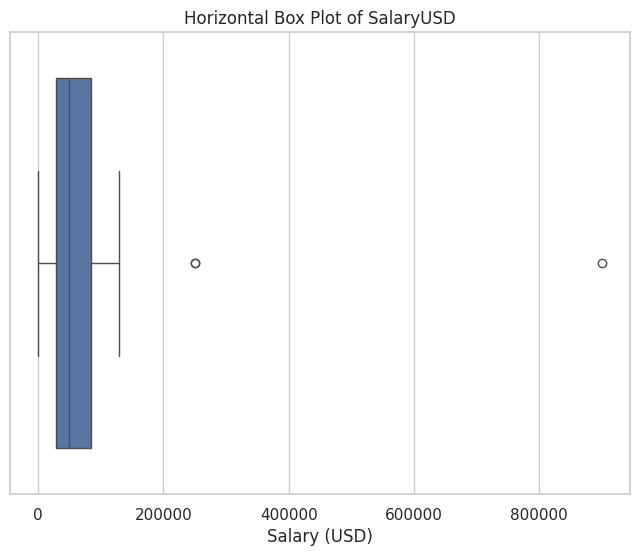

In [435]:
# Visualizing the outliers detected for 'Salaryusd' column with a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='SalaryUSD', orient='h')
plt.title('Horizontal Box Plot of SalaryUSD')
plt.xlabel('Salary (USD)')
plt.show()


From the Box plot, we get to know that the distribution is a bit right skewed. There are potential outliers present here.

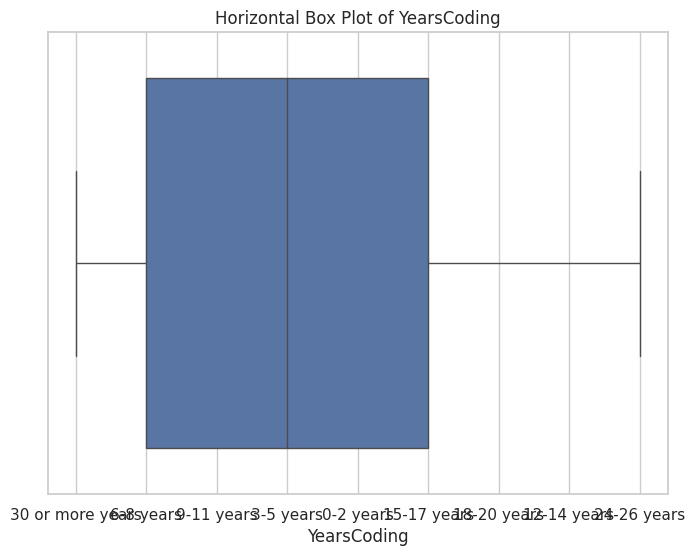

In [436]:
# Visualizing the outliers detected for 'YearsCoding' column with a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='YearsCoding', orient='h')
plt.title('Horizontal Box Plot of YearsCoding')
plt.xlabel('YearsCoding')
plt.show()


From the Box plot, we get to know that the distribution is symmetric and positively skewed. There are no potential outliers present here.

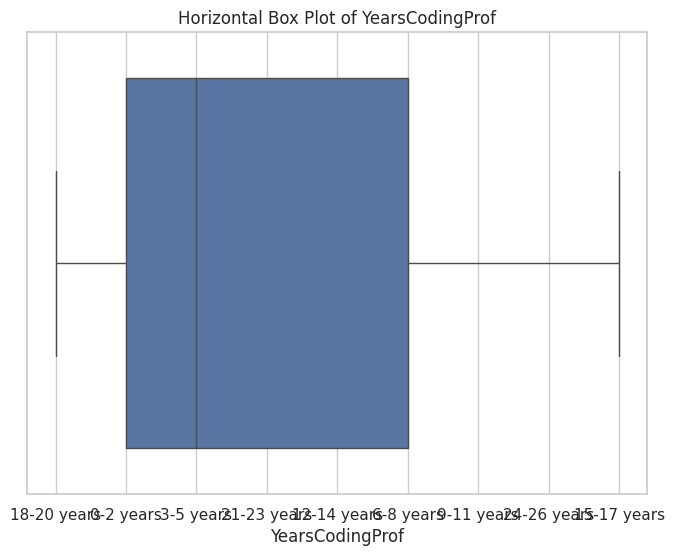

In [437]:
# Visualizing the outliers detected for 'YearsCodingProf' column with a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='YearsCodingProf', orient='h')
plt.title('Horizontal Box Plot of YearsCodingProf')
plt.xlabel('YearsCodingProf')
plt.show()

From the Box plot, we get to know that the distribution is not symmetric and right skewed. There are no potential outliers present here.

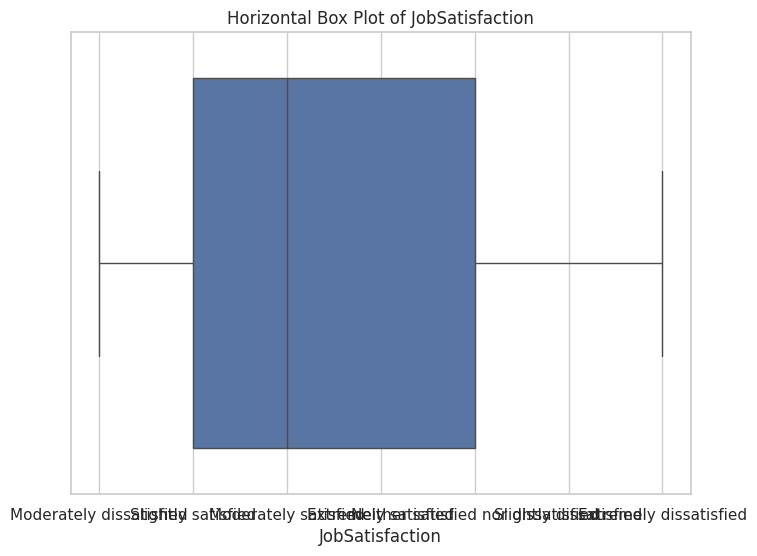

In [438]:
# Visualizing the outliers detected for 'JobSatisfaction' column with a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='JobSatisfaction', orient='h')
plt.title('Horizontal Box Plot of JobSatisfaction')
plt.xlabel('JobSatisfaction')
plt.show()

From the Box plot, we get to know that the distribution is not symmetric and right skewed. There are no potential outliers present here.

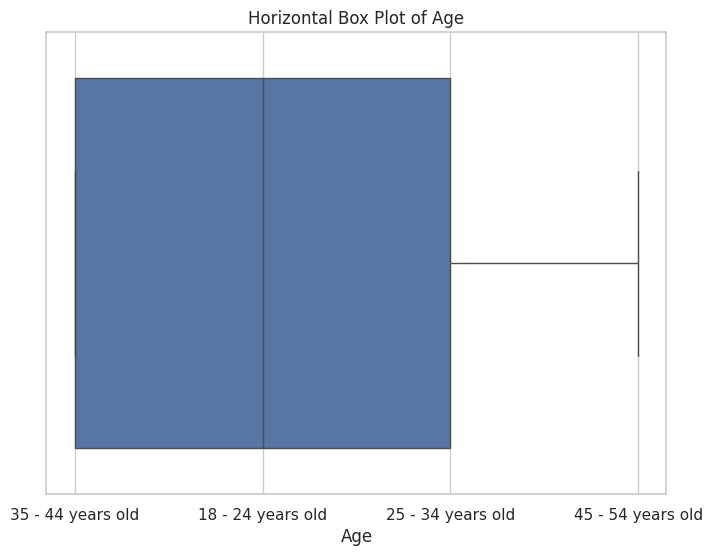

In [439]:
# Visualizing the outliers detected for 'age' column with a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Age', orient='h')
plt.title('Horizontal Box Plot of Age')
plt.xlabel('Age')
plt.show()

From the Box plot, we get to know that the distribution is symmetric and positively skewed. There are no potential outliers present here.

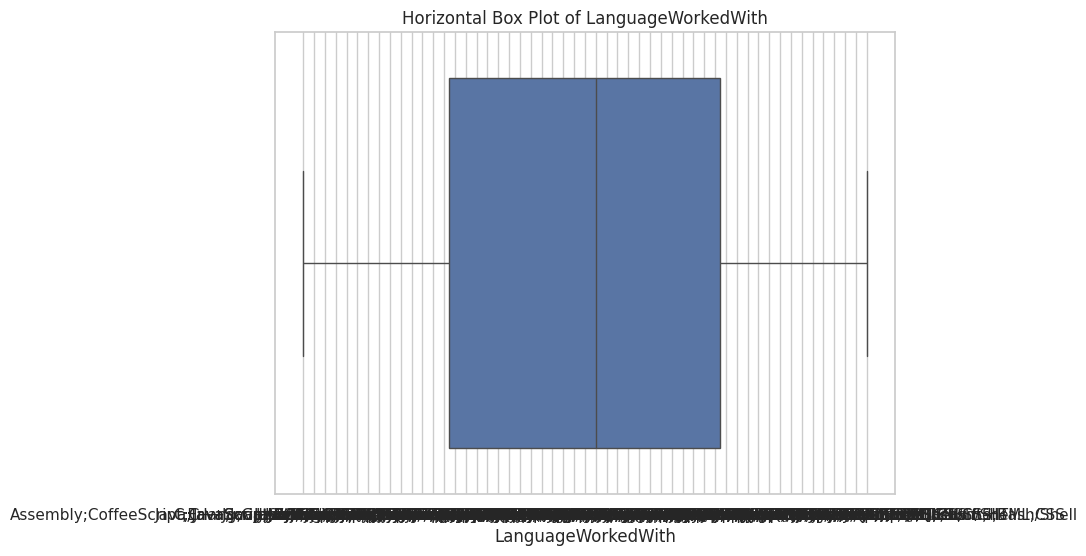

In [440]:
# Visualizing the outliers detected for 'LanguageWorkedWith' column with a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='LanguageWorkedWith', orient='h')
plt.title('Horizontal Box Plot of LanguageWorkedWith')
plt.xlabel('LanguageWorkedWith')
plt.show()

From the Box plot, we get to know that the distribution is symmetric and It is not skewed as well. There are no potential outliers present here.

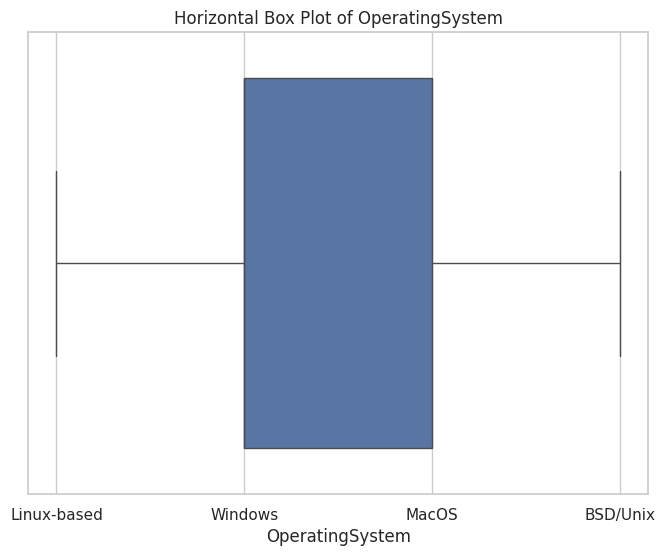

In [441]:
# Visualizing the outliers detected for 'OperatingSystem' column with a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='OperatingSystem', orient='h')
plt.title('Horizontal Box Plot of OperatingSystem')
plt.xlabel('OperatingSystem')
plt.show()

From the Box plot, we get to know that the distribution is symmetric and It is not skewed as well. There are no potential outliers present here.

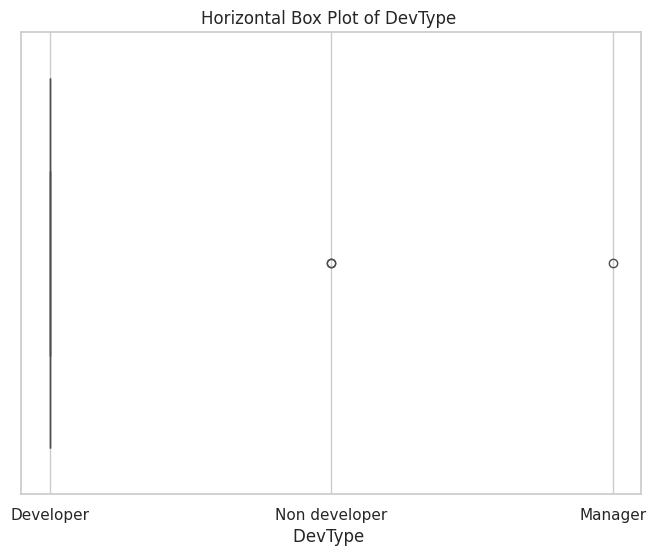

In [442]:
# Visualizing the outliers detected for 'DevType ' column with a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='DevType', orient='h')
plt.title('Horizontal Box Plot of DevType ')
plt.xlabel('DevType ')
plt.show()

From thi Box plot, We get to know that there are potential outliers.

*From all the Box plots we did, we can conclude that there are outlier in the DevType and SalaryUSD columns which are to be handled*

**HANDLING OUTLIERS**

*Removing the outliers*

Removing the outliers using interquartile range method


In [443]:
def remove_outliers_iqr(data, column):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter rows where values are within the bounds
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    return filtered_data

# Assuming 'df' is your DataFrame and 'SalaryUSD' is the column with outliers
df = remove_outliers_iqr(df, 'SalaryUSD')


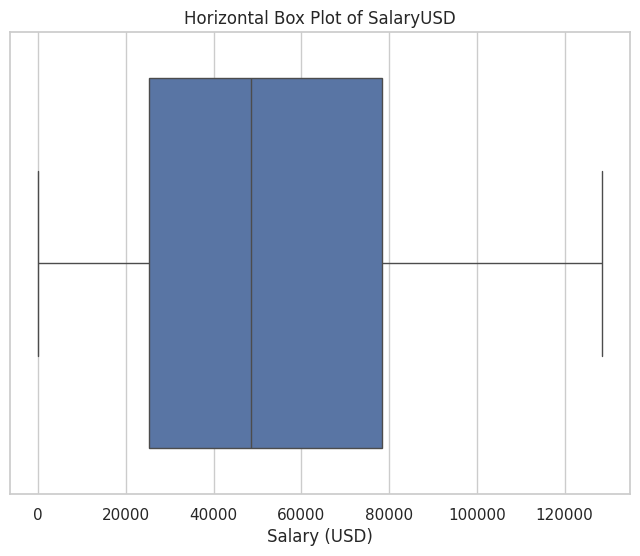

In [444]:
# Visualizing the outliers whether they are removed or not for 'Salaryusd' column with a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(df, x='SalaryUSD', orient='h')
plt.title('Horizontal Box Plot of SalaryUSD')
plt.xlabel('Salary (USD)')
plt.show()

From this we can see that there are no potential outliers left. Hence we successfully removed the outliers

*By this the data cleaning part is done*

**DATA VISUALIZATION**

**UNIVARIENT ANALYSIS**

*SalaryUSD*

This histogram shows the distribution of salaries and the bars represent the frequency of salaries.

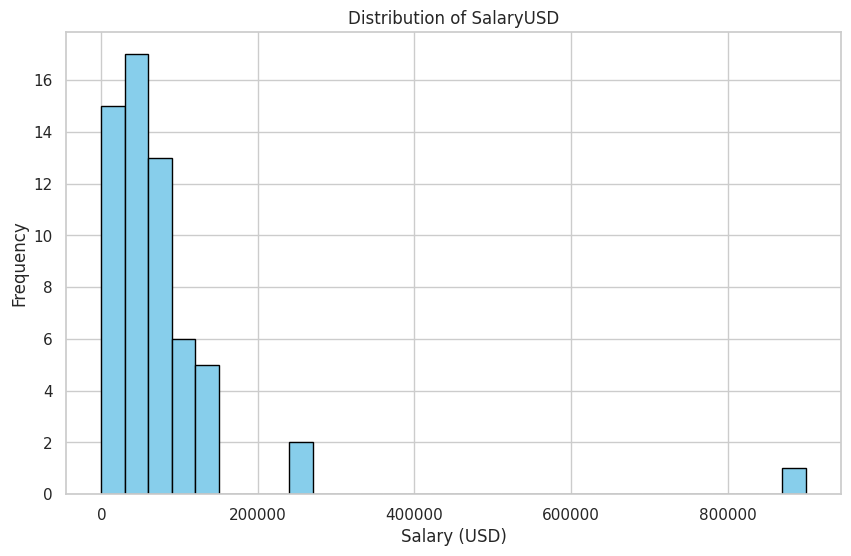

In [445]:
# Plotting the histogram for SalaryUSD
plt.figure(figsize=(10, 6))
plt.hist(cleaned_2018['SalaryUSD'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of SalaryUSD')
plt.grid(True)
plt.show()


From the result, we can know that there are many salaries in the lower range [between o to 200000 USD].

*DevType*

This plots a count plot which shows the distribution of developer type correspoding to the count of respondant

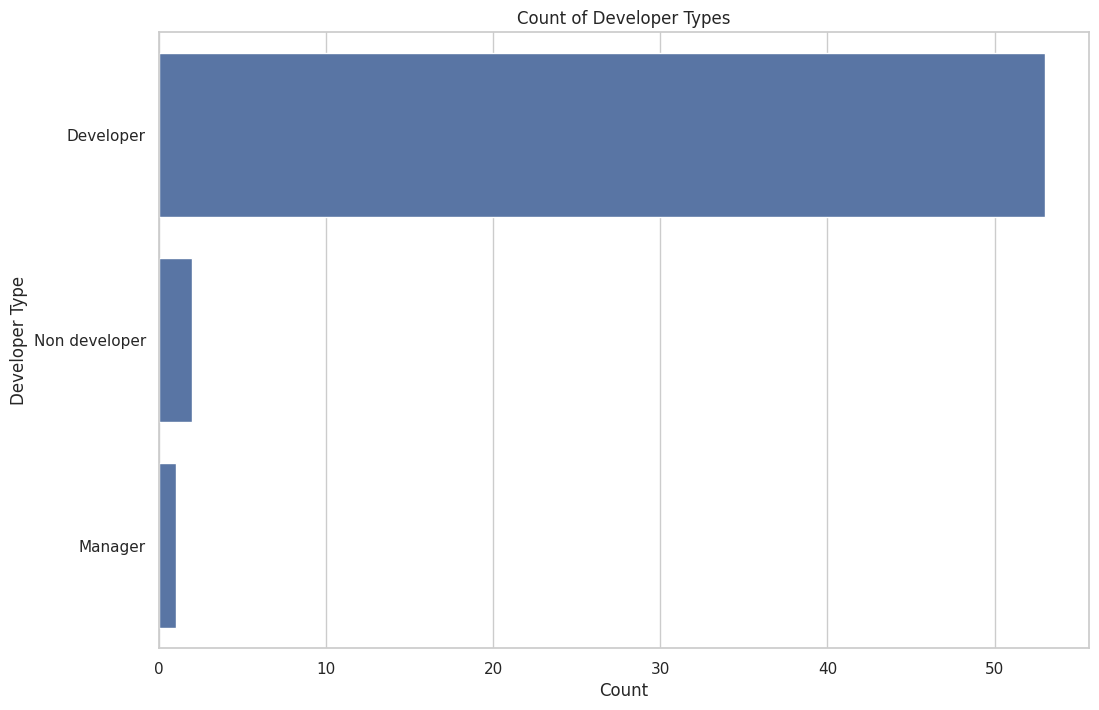

In [446]:
# plotting a count plot for DevType
plt.figure(figsize=(12, 8))
sns.countplot(y='DevType', data=df)
plt.title('Count of Developer Types')
plt.xlabel('Count')
plt.ylabel('Developer Type')
plt.show()


By the result, we can understand that there are extremely high developer categorized ones compared to the non developer and manager.

*Employement*

This plot shows the distribution of different employement statuses among the respondants

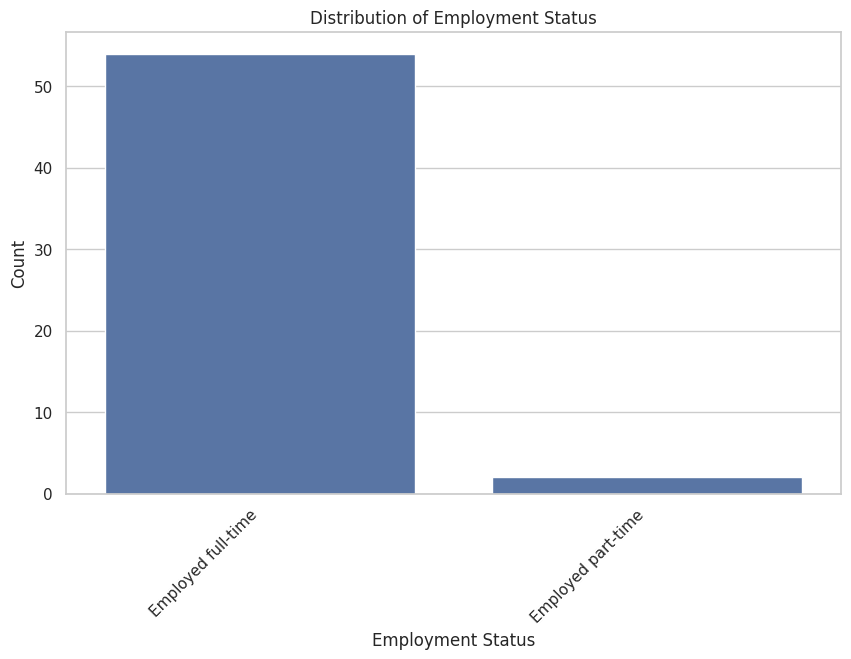

In [447]:
# Plotting the distribution of employment status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Employment', order=df['Employment'].value_counts().index)
plt.title('Distribution of Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


By the result, We can clearly see that large number of respondants are employed for full time.

*Years of coding profession*

This plot shows the distribution of years of professional coding experience among the respondants.

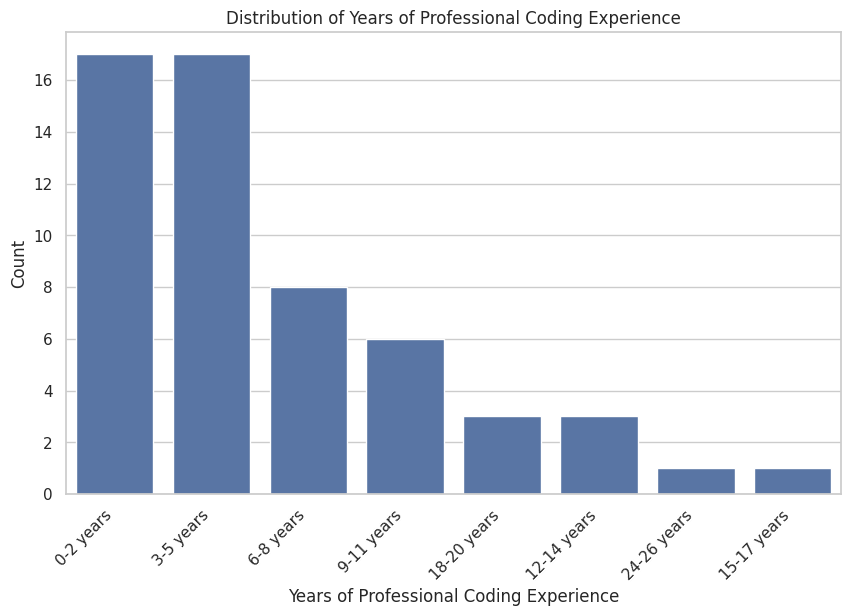

In [448]:
# Plotting the distribution of years of professional coding experience
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='YearsCodingProf', order=df['YearsCodingProf'].value_counts().index)
plt.title('Distribution of Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


By the result, we get to know that there are more people who are experienced for 0-2  years and 3-5 years.

*language worked with*

This plot shows the distribution of different languages worked with among the respondents.

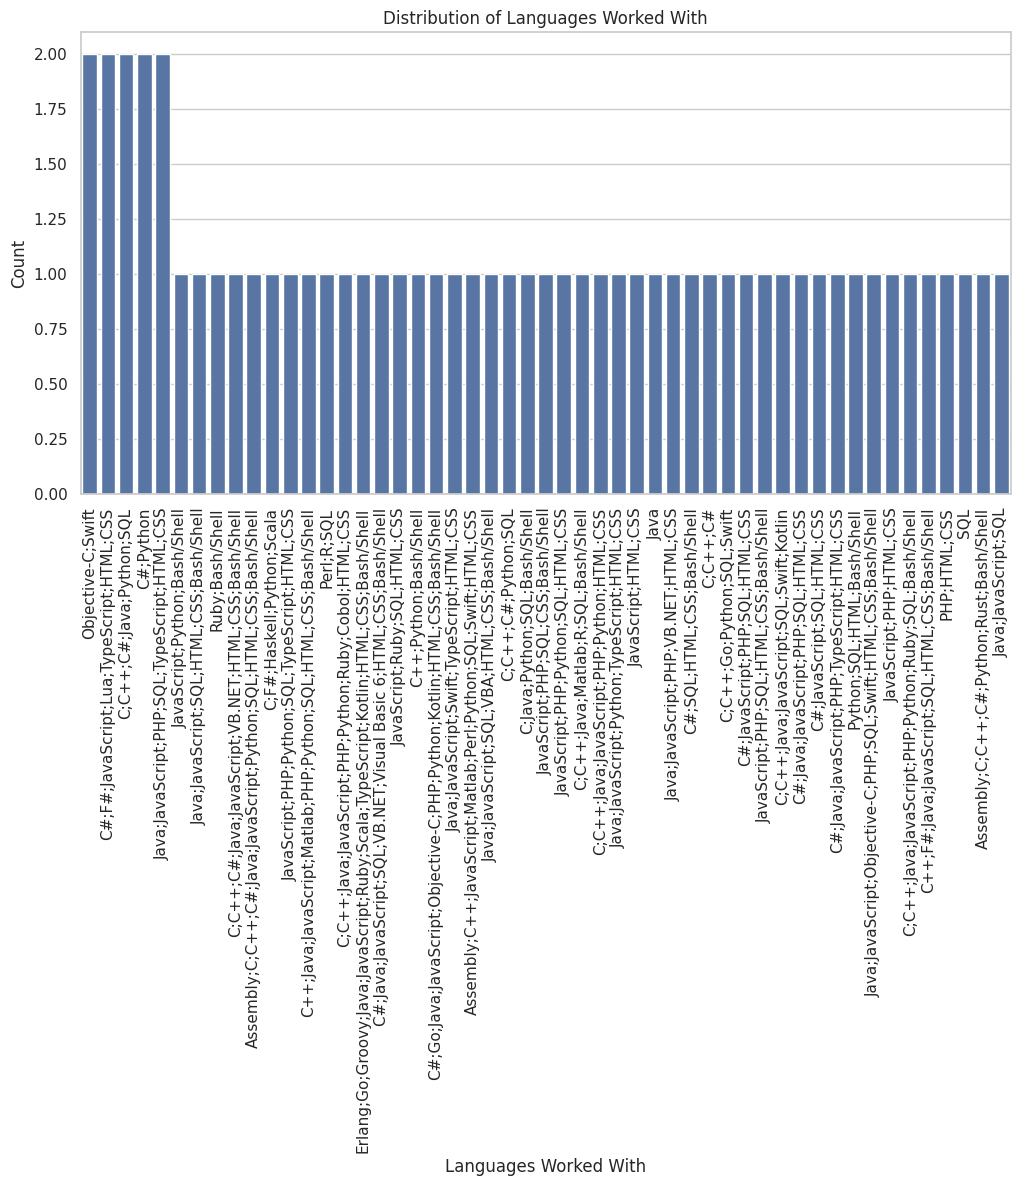

In [449]:
# Plotting the distribution of languages worked with
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='LanguageWorkedWith', order=df['LanguageWorkedWith'].value_counts().index)
plt.title('Distribution of Languages Worked With')
plt.xlabel('Languages Worked With')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


By the result, we get to know that all the languages are worked mostly but the first three row's languages are used the most.

**BIVARIATE ANALYSIS**

*AGE vs SALARYUSD*

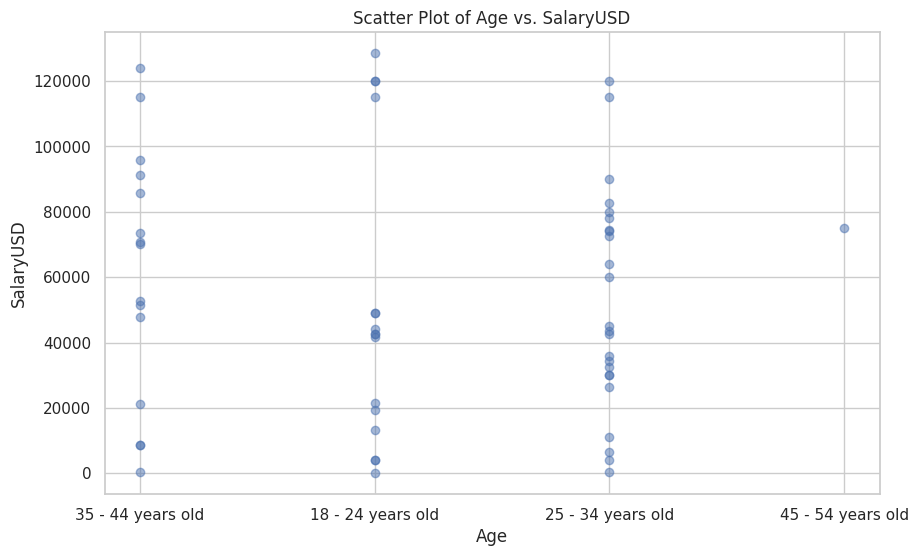

In [450]:
# Scatter plot for Age vs. SalaryUSD
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['SalaryUSD'], alpha=0.5)
plt.title('Scatter Plot of Age vs. SalaryUSD')
plt.xlabel('Age')
plt.ylabel('SalaryUSD')
plt.grid(True)
plt.show()


The higher density of dots in the 25-34 years and 35-44 years age ranges indicates that there are more individuals within these age brackets who are paid well.

*DEVTYPE vs SALARYUSD*

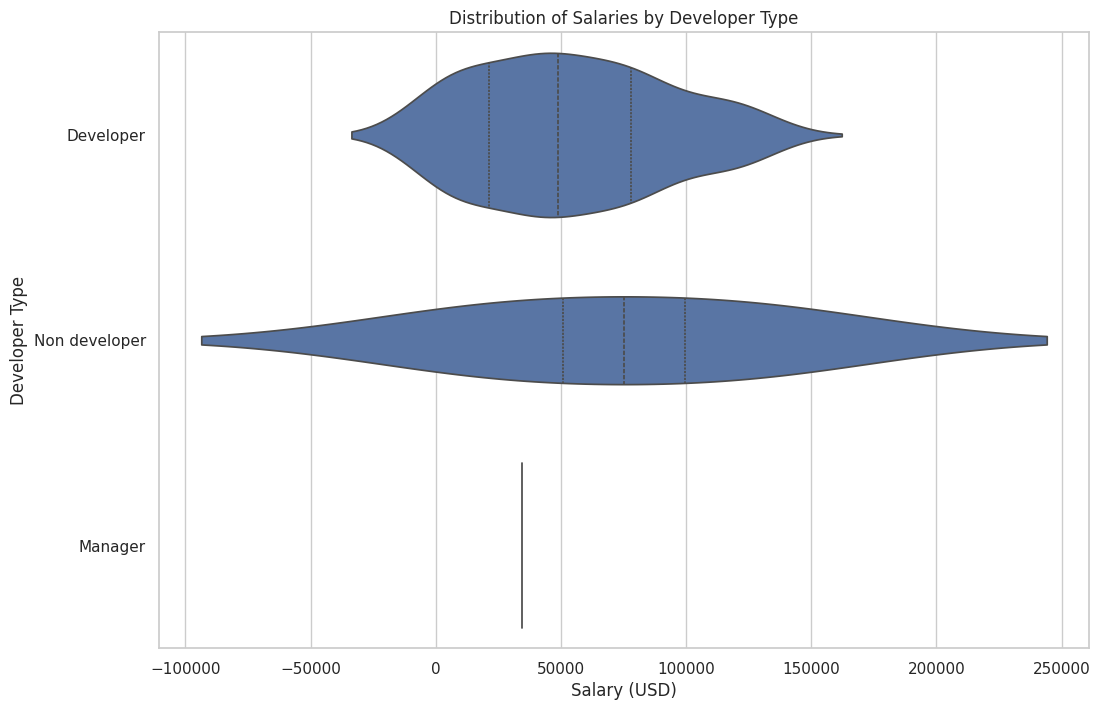

In [451]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Create the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='SalaryUSD', y='DevType', data=df, inner='quartile')
plt.title('Distribution of Salaries by Developer Type')
plt.xlabel('Salary (USD)')
plt.ylabel('Developer Type')
plt.show()


This tells that the salaries of the developer are much concentrated between 0 to 100000 USD and there is variablity in salaries. and the salaries of the non developer are evenly distributed and less variable and the salaries of the managers are very little variable.

*Employment vs SalaryUSD*

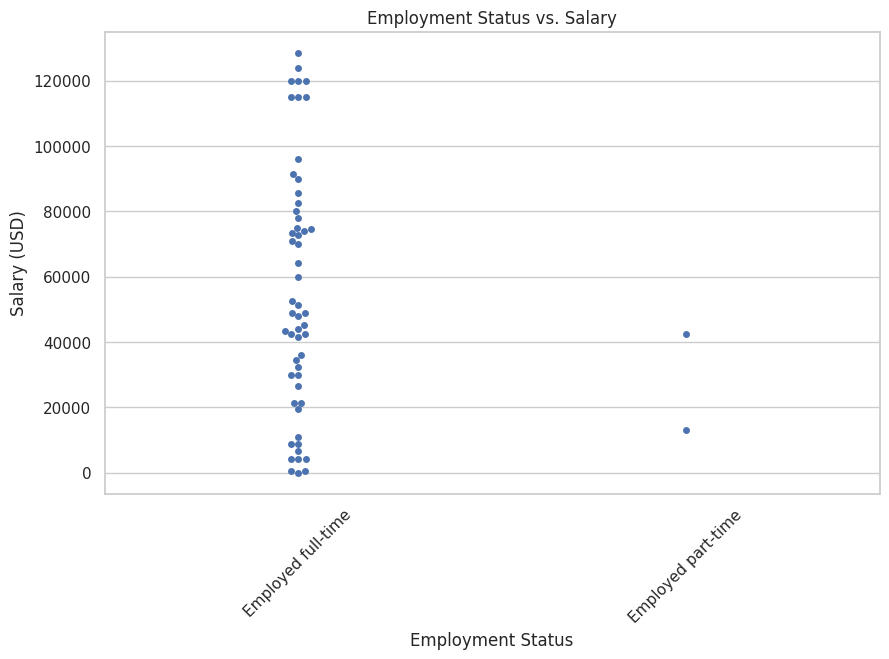

In [452]:
# Creating a swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Employment', y='SalaryUSD', data=df)
plt.title('Employment Status vs. Salary')
plt.xlabel('Employment Status')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


This observation says that the expectation that full-time positions typically offer higher salaries compared to part-time positions is true, resulting in more data points at higher salary ranges for full-time employment.








*YearsCodingProf vs. SalaryUSD*

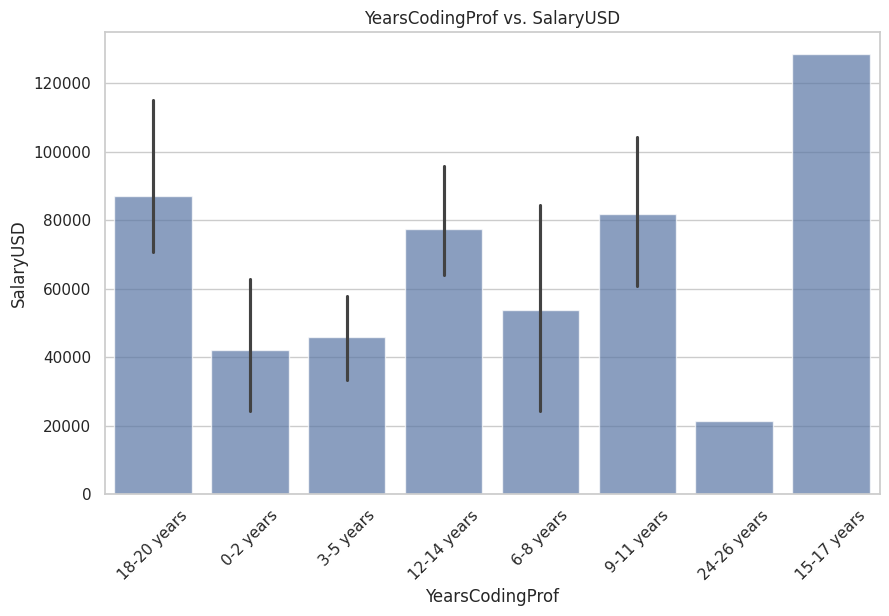

In [453]:
#Bar plot for YearsCodingProf vs. SalaryUSD
plt.figure(figsize=(10, 6))
sns.barplot(x='YearsCodingProf', y='SalaryUSD', data=df, alpha=0.7)
plt.title('YearsCodingProf vs. SalaryUSD')
plt.xlabel('YearsCodingProf')
plt.ylabel('SalaryUSD')
plt.xticks(rotation=45)
plt.show()


Results seem like individuals with 15-17 years of professional coding experience tend to have relatively higher salaries, with earning up to $120,000. This observation suggests that there may be a positive relation between years of professional coding experience and salary, indicating that more experienced professionals tend to command higher salaries.
The 24-26 years again tend to have low salary maybe due to the factor of age and a desire of having young ones to be worked.

*LanguageWorkedWith vs. SalaryUSD*

<ipython-input-454-ec6b2cfc68a6>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='LanguageWorkedWith', y='SalaryUSD', data=df, ci=None)


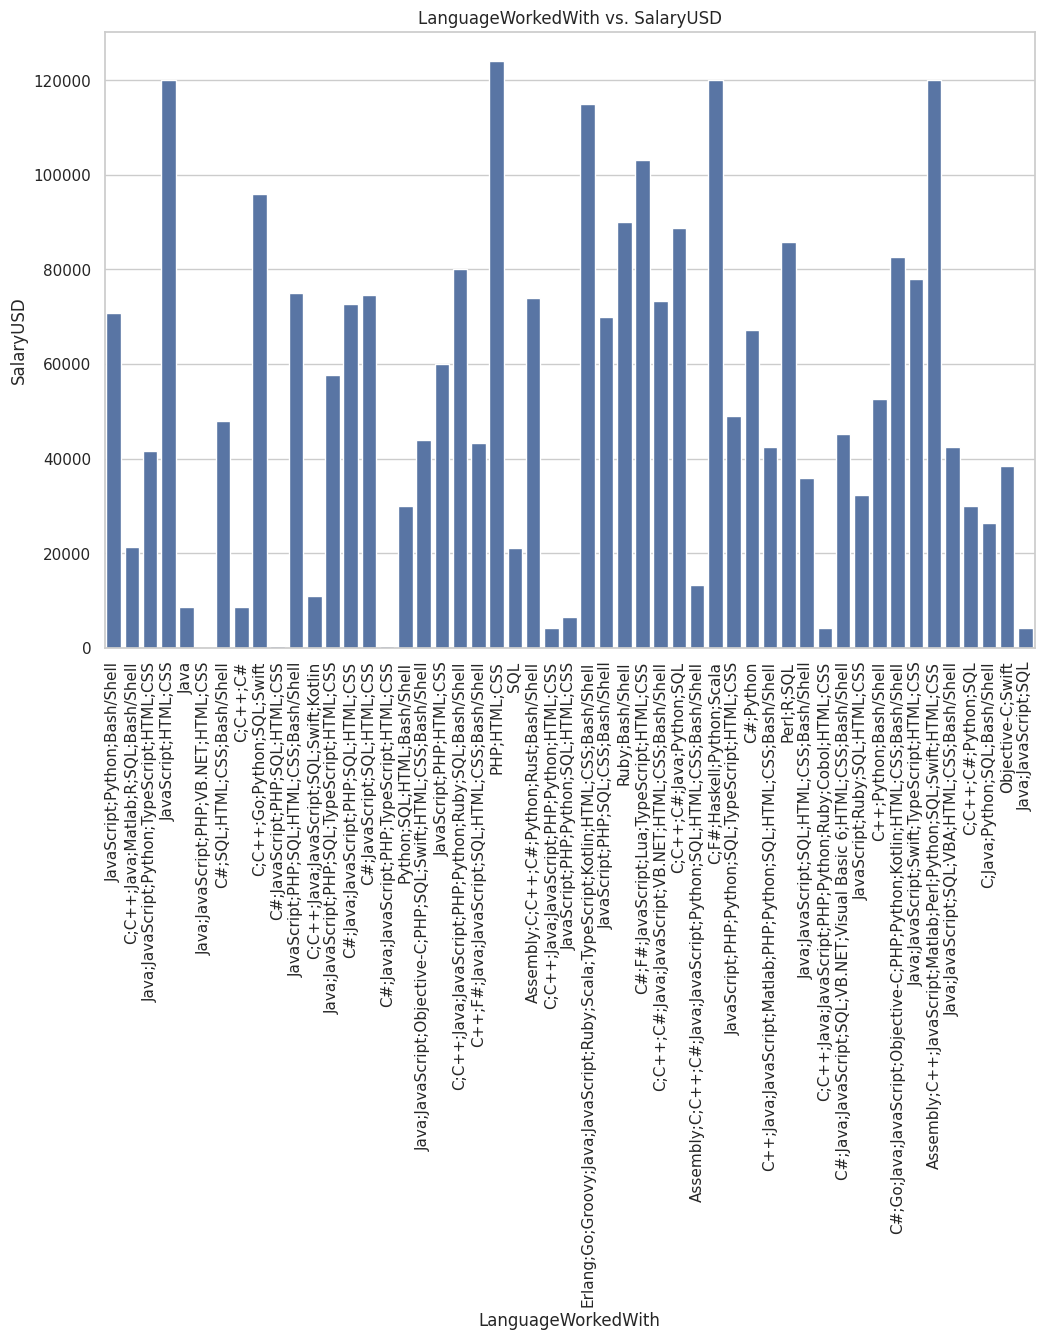

In [454]:
# Bar plot of LanguageWorkedWith vs. SalaryUSD
plt.figure(figsize=(12, 8))
sns.barplot(x='LanguageWorkedWith', y='SalaryUSD', data=df, ci=None)
plt.xticks(rotation=90)
plt.title('LanguageWorkedWith vs. SalaryUSD')
plt.xlabel('LanguageWorkedWith')
plt.ylabel('SalaryUSD')
plt.show()


The individuals who work with the languages oriented with css,html,php,swift tend to have more pay of salary extending upto 120000 USD.

All these visualizations provide valuable insights into different aspects of the data, such as the distribution of salary, the relationship between different variables like age and salary, and how various factors like employment type and years of coding experience relate to salary which answers many analysis questions.

**CORRELATION ANALYSIS**

*To understand the relation between them we need to perform correlation analysis.*

**Correlation analysis:AGE vs SALARYUSD**

Correlation Matrix:
             Average_Age  SalaryUSD
Average_Age     1.000000   0.122929
SalaryUSD       0.122929   1.000000


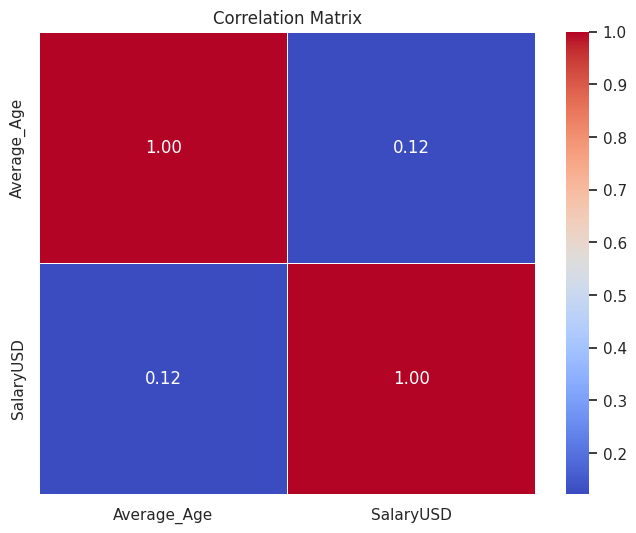

In [455]:
# Replacing 'years old' with an empty string and split the age range into two separate columns
df[['Age_Start', 'Age_End']] = df['Age'].str.replace(' years old', '').str.split(' - ', expand=True)

# Converting the 'Age_Start' and 'Age_End' columns to numeric format
df[['Age_Start', 'Age_End']] = df[['Age_Start', 'Age_End']].astype(float)

# Considering the average of 'Age_Start' and 'Age_End' to get the approximate age
df['Average_Age'] = (df['Age_Start'] + df['Age_End']) / 2

# Calculating the correlation coefficient
correlation = df[['Average_Age', 'SalaryUSD']].corr()

# Printing the correlation matrix
print("Correlation Matrix:")
print(correlation)

# Visualizing the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

From the result, we get to know that the correlation coefficient of 0.12 indicates a weak positive correlation between the variables 'Age' and 'SalaryUSD'. This means that as age increases, there is a slight tendency for salary to increase, but the relationship is not very strong.

**Correlation analysis:Job staistfaction vs SALARYUSD**

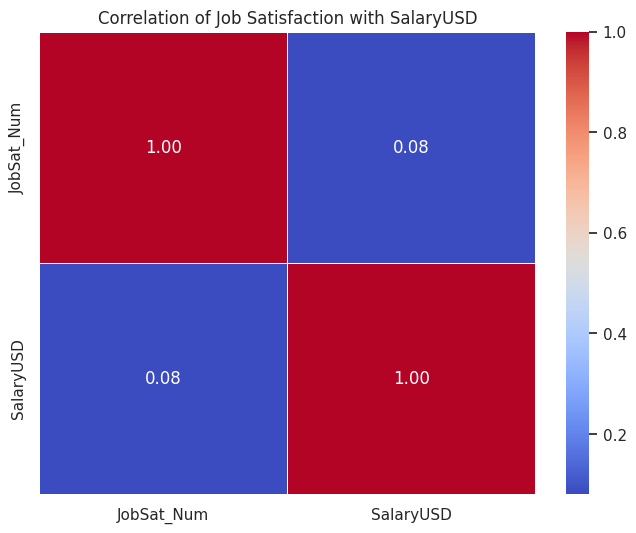

In [456]:
# Defining a mapping dictionary for job satisfaction levels
job_sat_mapping = {
    'Extremely dissatisfied': 1,
    'Moderately dissatisfied': 2,
    'Slightly dissatisfied': 3,
    'Neither satisfied nor dissatisfied': 4,
    'Slightly satisfied': 5,
    'Moderately satisfied': 6,
    'Extremely satisfied': 7
}

# Mapping the JobSatisfaction column using the defined mapping
df['JobSat_Num'] = df['JobSatisfaction'].map(job_sat_mapping)

# Calculating the correlation matrix
correlation_matrix = df[['JobSat_Num', 'SalaryUSD']].corr()

# Visualizing the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation of Job Satisfaction with SalaryUSD')
plt.show()


From the result, we can see that the correlation coefficient is 0.08 which indicates a very weak positive correlation between job satisfaction and salary. This means that there is a slight tendency for job satisfaction to increase as salary increases, but the relationship is not strong.

**Correlation analysis:Job staistfaction vs RACE ETHNICITY**

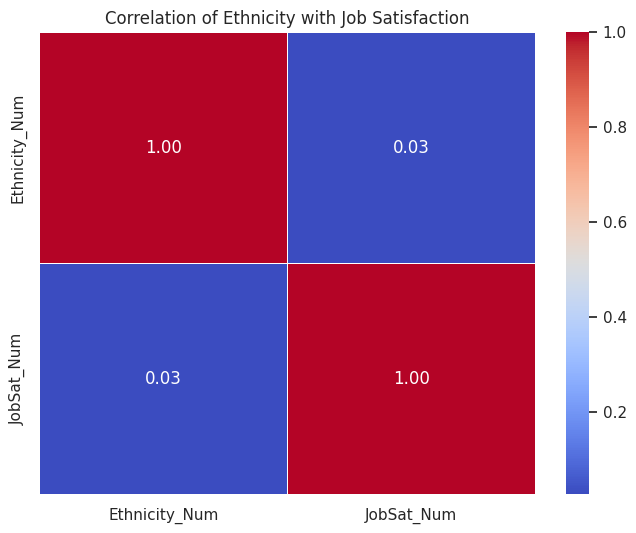

In [457]:
# Defining a mapping dictionary for ethnicities
ethnicity_mapping = {
    'Black or African descent': 1,
    'East Asian': 2,
    'Hispanic or Latino': 3,
    'South Asian': 4,
    'White or European descent': 5
}

# Mapping the RaceEthnicity column using the defined mapping
df['Ethnicity_Num'] = df['RaceEthnicity'].map(ethnicity_mapping)

# Calculating the correlation matrix
correlation_matrix_ethnicity = df[['Ethnicity_Num', 'JobSat_Num']].corr()

# Visualizing the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_ethnicity, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation of Ethnicity with Job Satisfaction')
plt.show()


From the result, we can see that the correlation coefficient is 0.03 which indicates a very weak positive correlation between ethnicity and job satisfaction. This suggests that there is little to no linear relationship between ethnicity and job satisfaction in the dataset.

**ANALYSIS**

**JOB SATISFACTION vs EDUCATION LEVEL**

In [458]:
# Calculate the distribution of job satisfaction levels within each education level category
education_job_satisfaction_distribution = df.groupby('EdLevel')['JobSatisfaction'].value_counts().unstack().fillna(0)

# Display the distribution
print("Job Satisfaction Distribution by Education Level:")
print(education_job_satisfaction_distribution)


Job Satisfaction Distribution by Education Level:
JobSatisfaction  Extremely dissatisfied  Extremely satisfied  \
EdLevel                                                        
Associate                           0.0                  0.0   
Bachelors                           2.0                  4.0   
No Degree                           0.0                  0.0   

JobSatisfaction  Moderately dissatisfied  Moderately satisfied  \
EdLevel                                                          
Associate                            0.0                   2.0   
Bachelors                            4.0                  15.0   
No Degree                            0.0                   3.0   

JobSatisfaction  Neither satisfied nor dissatisfied  Slightly dissatisfied  \
EdLevel                                                                      
Associate                                       0.0                    0.0   
Bachelors                                       4.0             

We can conclude the distribution of job satisfaction levels within each education level category.

For the "Associate" education level:

Moderately satisfied: 2
Moderately dissatisfied: 0
Neither satisfied nor dissatisfied: 0
Slightly satisfied: 0
Slightly dissatisfied: 0
Extremely satisfied: 0
Extremely dissatisfied: 0

For the "Bachelors" education level:

Moderately satisfied: 15
Moderately dissatisfied: 4
Neither satisfied nor dissatisfied: 4
Slightly satisfied: 6
Slightly dissatisfied: 5
Extremely satisfied: 4
Extremely dissatisfied: 2

For the "No Degree" education level:

Moderately satisfied: 3
Moderately dissatisfied: 0
Neither satisfied nor dissatisfied: 3
Slightly satisfied: 6
Slightly dissatisfied: 2
Extremely satisfied: 0
Extremely dissatisfied: 0

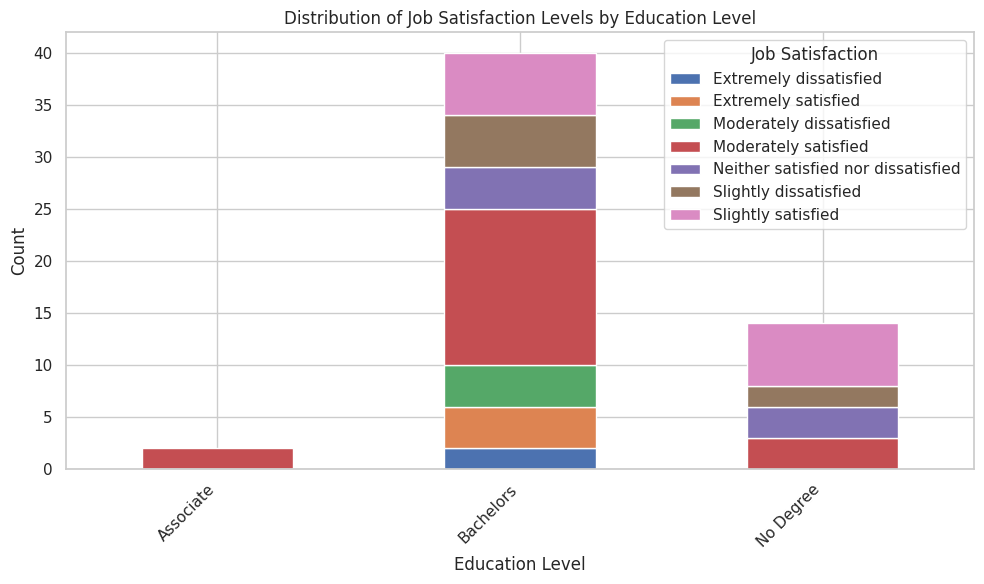

In [459]:
# Plotting the distribution of job satisfaction levels by education level
education_job_satisfaction_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Job Satisfaction Levels by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job Satisfaction')
plt.tight_layout()
plt.show()


**COUNTRY vs DEVTYPE**

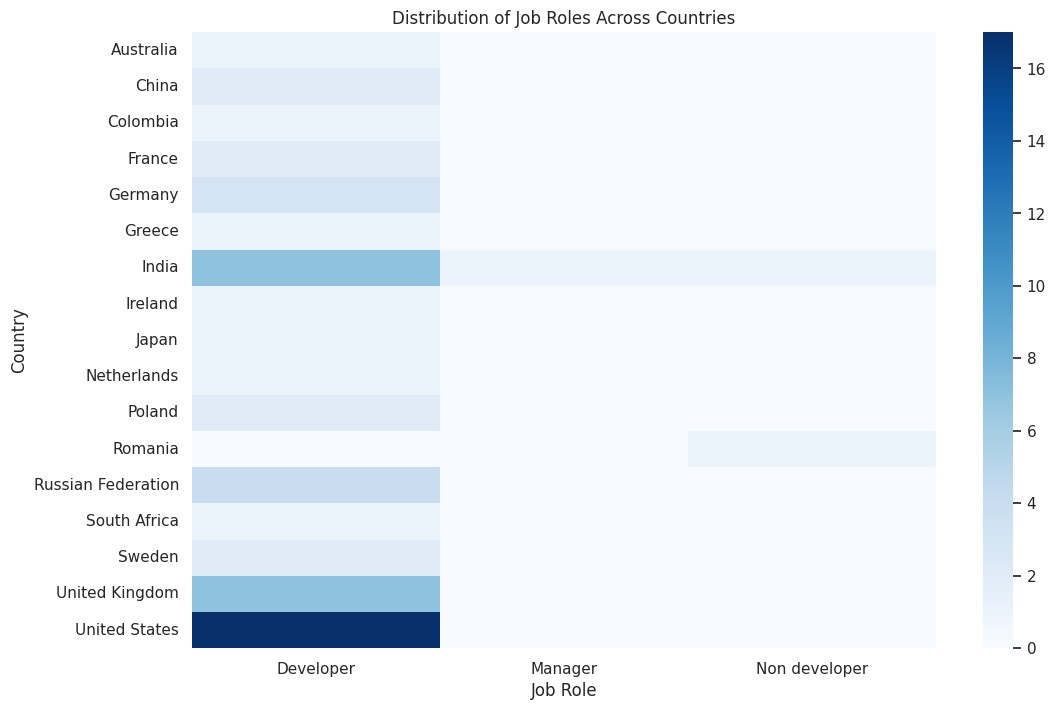

In [460]:
# Grouping the data by 'Country' and 'DevType', and counting the number of respondents in each category
job_role_country_distribution = df.groupby(['Country', 'DevType']).size().unstack().fillna(0)

# Plotting the distribution of job roles in different countries
plt.figure(figsize=(12, 8))
sns.heatmap(job_role_country_distribution, cmap='Blues')
plt.title('Distribution of Job Roles Across Countries')
plt.xlabel('Job Role')
plt.ylabel('Country')
plt.show()


We can conclude from the heatmap that the most developers are presnt in United States and then in India. We can also observe that there are barely any jobs of manager and non developer.

**Language desire next year vs Devtype**

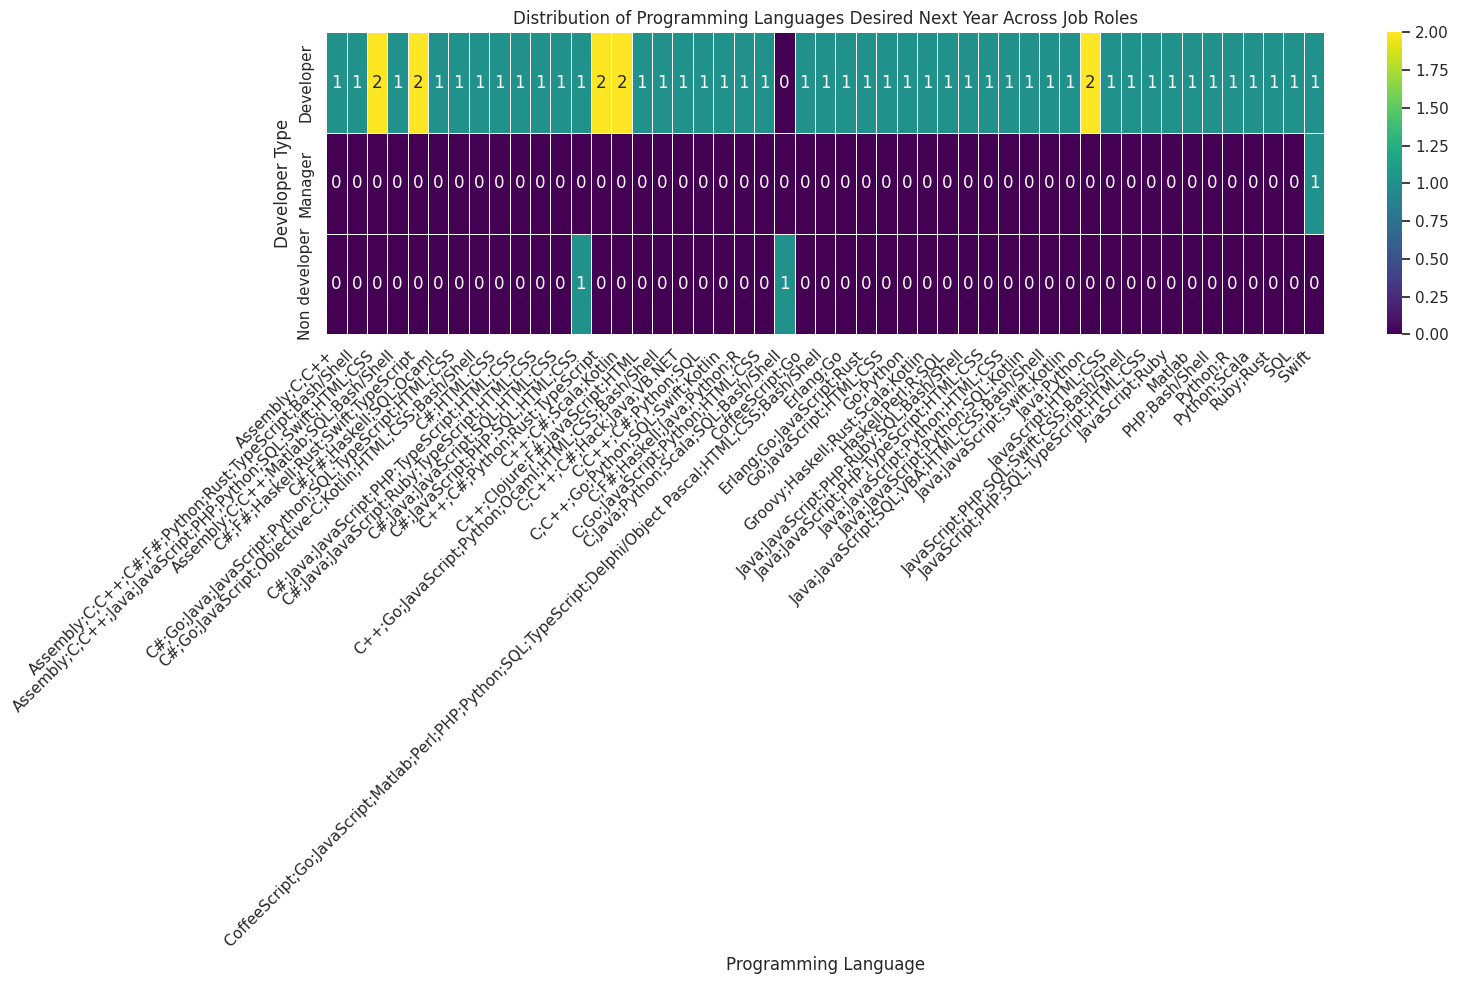

In [461]:
# Grouping the data by DeveloperType and LanguageDesireNextYear
language_job_grouped = df.groupby('DevType')['LanguageDesireNextYear'].value_counts().unstack().fillna(0)

# Plotting the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(language_job_grouped, cmap='viridis', annot=True, fmt='g', linewidths=0.5)
plt.title('Distribution of Programming Languages Desired Next Year Across Job Roles')
plt.xlabel('Programming Language')
plt.ylabel('Developer Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


We can see that, the languages used next year- javasrcipt,css,html,python are to be used by developers only and likely there are more job roles for developers only.

In [462]:
df.columns

Index(['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment',
       'EdLevel', 'UndergradMajor', 'CompanySize', 'DevType',
       ...
       'Age', 'Dependents', 'MilitaryUS', 'SurveyTooLong', 'SurveyEasy',
       'Age_Start', 'Age_End', 'Average_Age', 'JobSat_Num', 'Ethnicity_Num'],
      dtype='object', length=134)

**STUDENTS vs EMPLOYMENT**

*students who are employed*

In [463]:
# Count the number of respondents who are students and employed
student_employed_count = df[(df['Student'] == 'Yes, full-time') | (df['Student'] == 'Yes, part-time')]['Employment'].value_counts()

# Display the count
print("Number of students who are employed:")
print(student_employed_count)


Number of students who are employed:
Employment
Employed full-time    6
Employed part-time    2
Name: count, dtype: int64


*STUDENTS WHO ARE EMPLOYED AND NOT EMPLOYED AFTER COMPLETING THEIR STUDIES*

In [467]:
# Count the number of students who are employed
student_employed_count = df[(df['Student'] == 'Yes, full-time') | (df['Student'] == 'Yes, part-time')]['Employment'].value_counts()

# Display the count
print("Number of students who are employed:")
print(student_employed_count)

# Count the number of students who are not employed after completing studies
completed_students_count = df[(df['Student'] == 'Yes, full-time') | (df['Student'] == 'Yes, part-time') & (df['Employment'] == 'Not employed, and not looking for work')].shape[0]

# Display the count
print("\nNumber of students who are not employed after completing studies:")
print(completed_students_count)


Number of students who are employed:
Employment
Employed full-time    6
Employed part-time    2
Name: count, dtype: int64

Number of students who are not employed after completing studies:
6


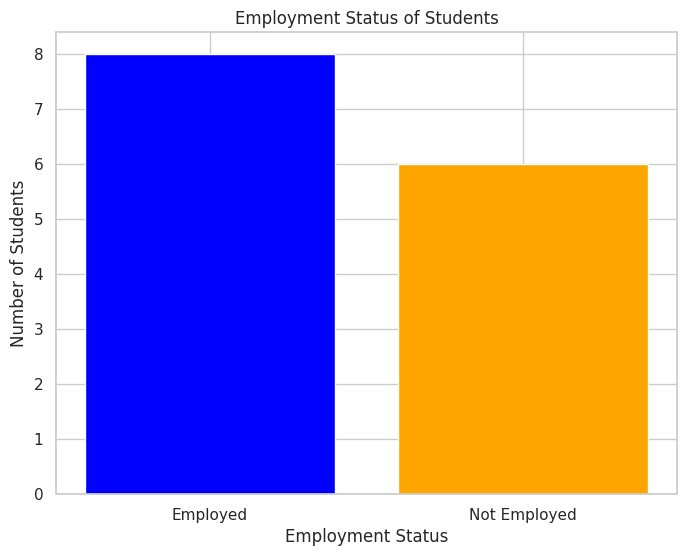

In [466]:
# Counting the number of students who are employed
student_employed_count = df[(df['Student'] == 'Yes, full-time') | (df['Student'] == 'Yes, part-time')]['Employment'].value_counts()

# Counting the number of students who are not employed after completing studies
completed_students_count = df[(df['Student'] == 'Yes, full-time') | (df['Student'] == 'Yes, part-time') & (df['Employment'] == 'Not employed, and not looking for work')].shape[0]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(['Employed', 'Not Employed'], [student_employed_count.sum(), completed_students_count], color=['blue', 'orange'])
plt.title('Employment Status of Students')
plt.xlabel('Employment Status')
plt.ylabel('Number of Students')
plt.show()


*PAY OF PYTHON USERS NEXT YEAR*

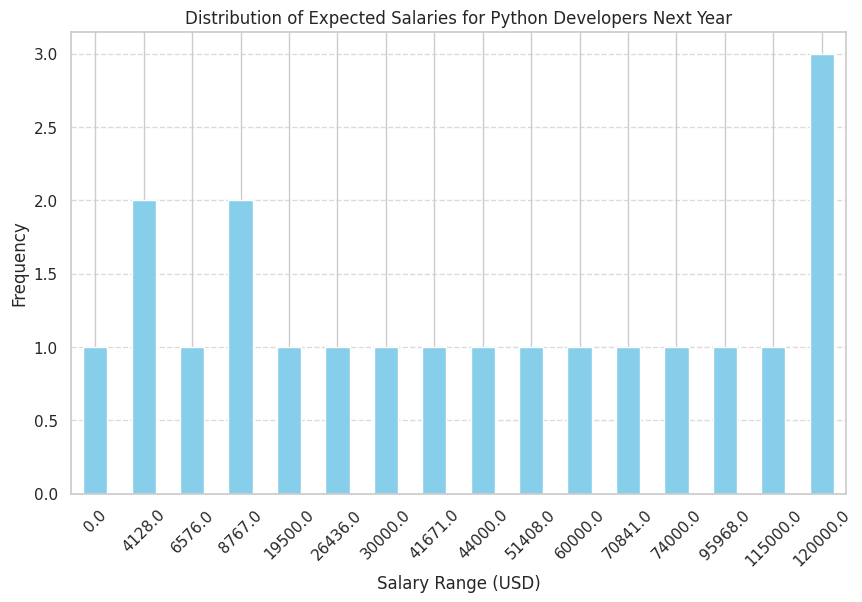

In [472]:
# Filtering the DataFrame for respondents who plan to work with Python next year
python_next_year = df[df['LanguageDesireNextYear'].str.contains('Python', na=False)]

# Calculating the salary distribution
salary_distribution = python_next_year['SalaryUSD'].value_counts().sort_index()

# Creating the bar plot
plt.figure(figsize=(10, 6))
salary_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Salary Range (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Expected Salaries for Python Developers Next Year')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


We can conlude that the frequency 3.0 that is the respondants can get the highest pay of 120000 USD.

We performed a good analysis and visualizations where we estimated the relationship between two columns and now we can answer any kind of questions.